# Teorema de Picard-Lindelof

Este é um belo teorema de exstência e unicidade de equações diferenciais ordinárias da forma 

$$
y'(t) = f(t, y(t)), y(t_0) = y_0. 
$$

In [20]:
import numpy as np
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

O teorema basicamente consiste em construir um operador da seguinte forma: 

$$
L(y(t)) = y_0 + \int_{t_0}^t f(s,y(s)) \, ds, 
$$

em que $L$ é um operador funcional. Note que se se $L(y(t)) = y(t)$ para todo $t$, teremos resolvido o problema, dado que 

$$
y(t) = y_0 + \int_{t_0}^t f(s,y(s)) \, ds, 
$$

é uma solução para $y' = f(t,y)$. Nesse caso, dizemos que queremos encontrar um **ponto fixo** do operador $L$. Se demonstrarmos que $L$ possui um ponto fixo e ele é único em algum intevalo suficientemente pequeno, então teremos demonstrado nosso teorema. 

Um teorema de existência (e unicidade local também) é o [Teorema de Banach](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem). Para isso, bastaria mostrar que $L$ leva funções de um espaço no mesmo espaço e que é uma contração, isto é, intuitivamente, se a cada vez que aplicamos $L$, as funções se aproximam e continuam no mesmo espaço, então vai existir um ponto fixo para ele. 

Nossa ideia aqui não é demonstrar o Teorema, mas sim mostrar a interação de Picard que é escrita da seguinte forma: 

$$
y_{k+1}(t) = y_0 + \int_{0}^t f(s,y_k(s)) \, ds, \\
y_0(t) = y_0.
$$

O teorema de ponto fixo de Banach nos mostra que $y_{k}$ converge para a solução $y$ para todo ponto $t$ em uma vizinhança de 0. 

We will use the quadrature function to integrate the function $f$. 


In [53]:
a = (1,2)
(1,*a)

(1, 1, 2)

In [54]:
def picard_iteration(fun, t_eval, y0, yk, args):
    
    pieces = [quad(func = fun, 
                   a = t_eval[i], 
                   b = t_eval[i+1], 
                   args = ((yk[i] + yk[i+1])/2, *args)
                  )[0] for i in range(len(t_eval)-1)]
    pieces.insert(0,0)
    yk = np.cumsum(np.array(pieces)) + y0
    
    return yk

We will consider the problem 
$$
y' = ay, \\
y(0) = y_0
$$

In [56]:
# defining the function
f = lambda t, y, a: a*y
a = 2

# time of definition
upper = 1
n = 100
t = np.linspace(0,upper,n)

This is the solution using Runge Kutta. 

In [57]:
solution =  solve_ivp(fun = f, 
                      t_span = (0, upper), 
                      t_eval = t,
                      y0 = (1,), 
                      method = 'RK45', 
                      args = (a,))

Here we present the first picard iterations. 

In [60]:
y0 = np.ones(n)
y1 = picard_iteration(fun = f, t_eval = t, y0 = (1,), yk = y0, args = (a,))
y2 = picard_iteration(fun = f, t_eval = t, y0 = (1,), yk = y1, args = (a,))
y3 = picard_iteration(fun = f, t_eval = t, y0 = (1,), yk = y2, args = (a,))
y4 = picard_iteration(fun = f, t_eval = t, y0 = (1,), yk = y3, args = (a,))

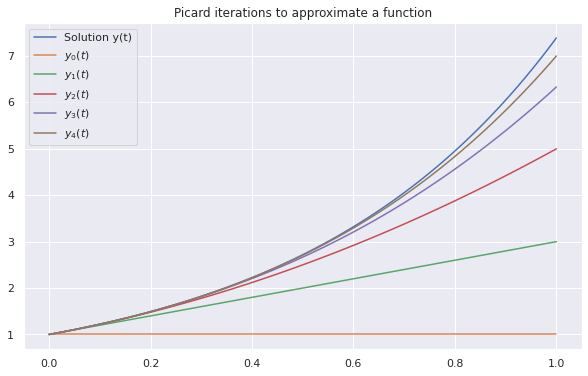

In [63]:
plt.figure(figsize = (10,6))
plt.title('Picard iterations to approximate a function')

plt.plot(solution.t, solution.y[0], label = 'Solution y(t)')
plt.plot(solution.t, y0, label = r'$y_0(t)$')
plt.plot(solution.t, y1, label = r'$y_1(t)$')
plt.plot(solution.t, y2, label = r'$y_2(t)$')
plt.plot(solution.t, y3, label = r'$y_3(t)$')
plt.plot(solution.t, y4, label = r'$y_4(t)$')

plt.legend()
plt.show()